## Instructions {-}

1. You may talk to a friend, discuss the questions and potential directions for solving them. However, you need to write your own solutions and code separately, and not as a group activity. 

2. Write your code in the **Code cells** and your answers in the **Markdown cells** of the Jupyter notebook. Ensure that the solution is written neatly enough to for the graders to understand and follow.

3. Use [Quarto](https://quarto.org/docs/output-formats/html-basics.html) to render the **.ipynb** file as HTML. You will need to open the command prompt, navigate to the directory containing the file, and use the command: `quarto render filename.ipynb --to html`. Submit the HTML file.

4. The assignment is worth 100 points, and is due on **18th October 2025 at 11:59 pm**. 

5. **Five points are properly formatting the assignment**. The breakdown is as follows:
    - Must be an HTML file rendered using Quarto **(1 point)**. *If you have a Quarto issue, you must mention the issue & quote the error you get when rendering using Quarto in the comments section of Canvas, and submit the ipynb file.* 
    - No name can be written on the assignment, nor can there be any indicator of the student’s identity—e.g. printouts of the working directory should not be included in the final submission.  **(1 point)**
    - There aren’t excessively long outputs of extraneous information (e.g. no printouts of entire data frames without good reason, there aren’t long printouts of which iteration a loop is on, there aren’t long sections of commented-out code, etc.) **(1 point)**
    - Final answers to each question are written in the Markdown cells. **(1 point)**
    - There is no piece of unnecessary / redundant code, and no unnecessary / redundant text. **(1 point)**

6.  The maximum possible score in the assigment is 100  + 15 (bonus task) + 5 (AI usage disclosure)= 120 out of 100.

## Objective

- **Reinforce Knowledge of Gradient Descent:** Apply your understanding of gradient descent to classification problems by implementing logistic regression and softmax regression from scratch.
- **Hands-on Implementation:** Build classification models manually to gain deeper insights into their mathematical foundations and working principles.
- **Explore Customization Options:** Learn how implementing models from scratch allows you to:
  - Adjust and optimize model parameters for specific requirements.
  - Add features or constraints that might not be possible with standard libraries.
- **Compare with Pre-built Models:** Use scikit-learn’s logistic regression as a baseline to evaluate the performance and efficiency of your custom implementation. This will help you understand when to use custom models and when to leverage pre-built ones.
- **Prepare for Real-world Scenarios:** Understand the scenarios where off-the-shelf models are not sufficient, allowing you to confidently tackle complex machine learning problems and create novel solutions.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Refreshing the Foundations: Sigmoid & Logistic Regression

### Why Logistic Regression? The Classification Challenge

<p align="center">
  <img src="images/image-96.webp" alt="Logistic Cost Function" width="400">
</p>

**The Problem**: Linear regression gives us $f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = \mathbf{w} \cdot  \mathbf{x}^{(i)} + b$, but for classification:

- **Linear regression outputs**: Any real number (-∞ to +∞)
- **Classification needs**: Probabilities between 0 and 1
- **Binary targets**: $y \in \{0, 1\}$ (e.g., Disease/No Disease, Spam/Not Spam)

**The Solution**: Transform linear outputs into probabilities using the **sigmoid function**, creating a model that outputs meaningful probabilities for binary classification decisions.

**Real-World Context**: In this assignment, you'll predict heart disease risk where:
- **Input**: Patient medical data (age, cholesterol, chest pain type, etc.)
- **Output**: Probability of heart disease (0 = healthy, 1 = disease)
- **Goal**: Build a model doctors can trust for medical decision-making


### The Sigmoid Function: Mathematical Bridge to Probabilities

**Mathematical Definition:**
$$g(z) = \frac{1}{1 + e^{-z}} \tag{1}$$

**What This Function Does:**
- **Input $z$**: Any real number (-∞ to +∞) from linear model
- **Output $g(z)$**: Always between 0 and 1 (perfect for probabilities!)
- **S-shaped curve**: Smooth transition from 0 to 1

**Key Properties:**
- **$g(0) = 0.5$**: Neutral prediction (equal probability of both classes)
- **$g(z) \to 1$** as $z \to +\infty$: Strong positive evidence → high probability  
- **$g(z) \to 0$** as $z \to -\infty$: Strong negative evidence → low probability
- **Always smooth**: No sudden jumps, making it perfect for gradient descent optimization

**Practical Interpretation:**
In logistic regression, $z = \mathbf{w} \cdot \mathbf{x} + b$ represents the "log-odds" or "logit":
- **Positive $z$**: Model leans toward class 1 (e.g., "has disease")
- **Negative $z$**: Model leans toward class 0 (e.g., "healthy")  
- **Magnitude of $|z|$**: Confidence level of the prediction

**Implementation Note**: NumPy's [`exp()`](https://numpy.org/doc/stable/reference/generated/numpy.exp.html) function handles vectorized computation efficiently, but requires careful numerical handling to avoid overflow (which you'll implement!).

### Logistic Regression: Model
<img align="left" src="./images/C1_W3_LogisticRegression_right.png"     style=" width:300px; padding: 10px; " > A logistic regression model applies the sigmoid to the familiar linear regression model as shown below:

$$ 
f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = g(\mathbf{w} \cdot \mathbf{x}^{(i)} + b ) \tag{2} 
$$ 

  where

  $$
  g(z) = \frac{1}{1+e^{-z}}\tag{3}
  $$

### Logistic Regression: Loss Function

Logistic Regression uses a loss function more suited to the task of categorization where the target is 0 or 1 rather than any number. 

>**Definition Note:**   In this course, these definitions are used:  
**Loss** is a measure of the difference of a single example to its target value while the  
**Cost** is a measure of the losses over the training set


This is defined: 
* $loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)})$ is the cost for a single data point, which is:

\begin{equation}
  loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) = \begin{cases}
    - \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) & \text{if $y^{(i)}=1$}\\
    - \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) & \text{if $y^{(i)}=0$}
  \end{cases}
\end{equation}


*  $f_{\mathbf{w},b}(\mathbf{x}^{(i)})$ is the model's prediction, while $y^{(i)}$ is the target value.

*  $f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = g(\mathbf{w} \cdot\mathbf{x}^{(i)}+b)$ where function $g$ is the sigmoid function.

The defining feature of this loss function is the fact that it uses two separate curves. One for the case when the target is zero or ($y=0$) and another for when the target is one ($y=1$). Combined, these curves provide the behavior useful for a loss function, namely, being zero when the prediction matches the target and rapidly increasing in value as the prediction differs from the target. Consider the curves below:

<div style="text-align: center;">
    <img src=https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTIyEcDUIGx9kLDohkOyjq8X2OkQZbxLoVW3JyEefVtog&s alt="Description of image" width="400"/>
</div>

Combined, the curves are similar to the quadratic curve of the squared error loss. Note, the x-axis is $f_{\mathbf{w},b}$ which is the output of a sigmoid. The sigmoid output is strictly between 0 and 1.

The loss function above can be rewritten to be easier to implement.
    $$loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) = (-y^{(i)} \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right)$$
  
This is a rather formidable-looking equation. It is less daunting when you consider $y^{(i)}$ can have only two values, 0 and 1. One can then consider the equation in two pieces:  
when $ y^{(i)} = 0$, the left-hand term is eliminated:
$$
\begin{align}
loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), 0) &= (-(0) \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - 0\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) \\
&= -\log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right)
\end{align}
$$
and when $ y^{(i)} = 1$, the right-hand term is eliminated:
$$
\begin{align}
  loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), 1) &=  (-(1) \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - 1\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right)\\
  &=  -\log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right)
\end{align}
$$

**Why This Loss Function Works:**
1. **Probabilistic Foundation**: Derived from maximum likelihood estimation
2. **Convex Optimization**: Guarantees unique global minimum (perfect for gradient descent)
3. **Penalizes Confidence**: Wrong confident predictions get heavily penalized
4. **Smooth Gradients**: Enables stable gradient descent convergence

**Connection to Your Implementation**: This loss function is exactly what you'll implement in Task 1, with the addition of L2 regularization to prevent overfitting on the heart disease dataset.

### Logistic Regression: Cost Function (Training Objective)

**From Individual Loss to Overall Cost:**

The **cost function** aggregates individual losses across all training examples to create our optimization objective:

$$ J(\mathbf{w},b) = \frac{1}{m} \sum_{i=0}^{m-1} \left[ loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) \right] \tag{1}$$

Where the individual **loss** for each example is:

$$loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) = -y^{(i)} \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) \tag{2}$$

**The Complete Model Pipeline:**
$$
\begin{align}
  f_{\mathbf{w},b}(\mathbf{x^{(i)}}) &= g(z^{(i)})\tag{3} \\
  z^{(i)} &= \mathbf{w} \cdot \mathbf{x}^{(i)}+ b\tag{4} \\
  g(z^{(i)}) &= \frac{1}{1+e^{-z^{(i)}}}\tag{5} 
\end{align}
$$

**Optimization Goal**: Find weights $\mathbf{w}$ and bias $b$ that minimize $J(\mathbf{w},b)$ using **gradient descent**.


## Bridge to Implementation: What You'll Build

### Your Assignment Journey:
1. **Task 1**: Implement cost function with L2 regularization → **20 points**  
2. **Task 2**: Apply to heart disease dataset with preprocessing → **15 points**  
3. **Task 3**: Experiment with regularization strength (λ) → **20 points**  
4. **Task 4**: Benchmark against scikit-learn LogisticRegression → **20 points**  
5. **Task 5**: Explore the `tol` parameter in gradient descent–based models → **15 points**  
6. **Task 6**: Summarize key learnings and insights → **5 points** 

### ⭐ Bonus Task  
Extend your L2-regularized logistic regression by adding a **`tol` stopping criterion**, and compare its behavior with scikit-learn’s implementation -> **15 points**
   
### Key Implementation Challenges You'll Solve:

- **Numerical Stability**: Prevent `log(0)` errors that break gradient descent
- **Vectorization**: Implement efficient matrix operations for real-world performance
- **Regularization**: Add L2 penalty to prevent overfitting on complex medical data
- **Gradient Computation**: Derive and implement the gradient for weight updates
- **Convergence Monitoring**: Track training progress and detect overfitting

### Real-World Impact:
Your implementation will predict heart disease risk using patient data—a model that could potentially assist medical professionals in making life-saving decisions. The mathematical rigor you develop here translates directly to production ML systems used in healthcare, finance, and technology.
 

## Task 1: Implementing L2 Regularized Logistic Regression with Vectorized Gradient Descent **(20 points)**

###  **Objective**
Implement a complete L2 regularized (Ridge) logistic regression algorithm from scratch using vectorized operations to prevent overfitting in binary classification problems.

### 📋 **Implementation Requirements**

#### **Main Function Signature**
Your implementation should create a main training function that takes these inputs:

- **X_train** (ndarray): Training feature matrix (m × n) - **Note**: Should include bias column of ones as first column
- **y_train** (ndarray): Training labels (m × 1) 
- **X_test** (ndarray): Test feature matrix for monitoring overfitting - **Note**: Should include bias column  
- **y_test** (ndarray): Test labels for performance tracking
- **w_in** (ndarray): Initial weights ((n+1) × 1) - **Includes bias weight as first element**
- **alpha** (float): Learning rate (typically 0.001 - 0.01)
- **num_iters** (int): Number of training iterations
- **lambda_reg** (float): L2 regularization strength (λ ≥ 0)

#### **Expected Outputs**
- **Optimized parameters**: Final weights after training
- **Training cost history**: Cost values at each iteration on training data
- **Test cost history**: Cost values at each iteration on test data (for overfitting analysis)

### **Implementation Structure**

#### **Step 1: Cost Function with L2 Regularization**
```python
def compute_cost_logistic_ridge(X, y, w, lambda_reg):
```
**Mathematical Formula:**
$$J(w) = \frac{1}{m}\sum_{i=1}^{m} \left[ -y^{(i)} \log(h_w(x^{(i)})) - (1-y^{(i)}) \log(1-h_w(x^{(i)})) \right] + \frac{\lambda}{2m} \sum_{j=1}^{n} w_j^2$$

Where $h_w(x) = \sigma(w^T x)$ and $\sigma(z) = \frac{1}{1+e^{-z}}$

**Key Implementation Notes:**

- Use vectorized operations for efficiency
- **Bias handling**: Don't regularize the bias term (w[0]) - exclude from L2 penalty
- **Data preparation**: Add column of ones to X matrices for bias term
- Handle numerical stability with log functions

**Why Numerical Stability Matters:**

- **When h = 0**: `log(0) = -∞` → **NaN in cost calculations**
- **When h = 1**: `log(1-h) = log(0) = -∞` → **NaN in cost calculations**  
- **When it occurs**: Sigmoid outputs extreme values (overconfident predictions)
- **Consequence**: Entire gradient descent breaks due to NaN propagation

   **Practical Example:**
   ```python
   # Without clipping - BREAKS!
   h = np.array([0.0, 0.5, 1.0])  # Sigmoid predictions
   cost = -np.log(h)  # Returns: [inf, 0.693, 0.0]
   # ↑ inf values propagate to gradients → NaN → training failure

   # With clipping - WORKS!
   h_safe = np.clip(h, 1e-15, 1-1e-15)  # Safe range: [1e-15, 1-1e-15]
   cost = -np.log(h_safe)  # Returns: [34.54, 0.693, 34.54]  
   # ↑ All finite values → stable gradients → successful training
   ```

**Professional Tip**: All major ML libraries (TensorFlow, PyTorch, sklearn) use similar clipping internally!

#### **Step 2: Gradient Computation with L2 Regularization**
```python
def compute_gradient_logistic_ridge(X, y, w, lambda_reg):
```
**Mathematical Formula:**
$$\frac{\partial J}{\partial w_j} = \frac{1}{m} X^T (\sigma(Xw) - y) + \frac{\lambda}{m} w_j \quad \text{(for } j > 0\text{)}$$
$$\frac{\partial J}{\partial w_0} = \frac{1}{m} X^T (\sigma(Xw) - y) \quad \text{(bias term, no regularization)}$$

**Implementation Note**: The gradient vector should be same shape as w_in ((n+1) × 1), where the first element corresponds to the bias term gradient (no regularization) and remaining elements include the L2 regularization term.

#### **Step 3: Gradient Descent Algorithm**
```python
def gradient_descent_logistic_ridge(X_train, y_train, X_test, y_test, w_in, alpha, num_iters, lambda_reg):
```

#### 💡 **Implementation Tips**

1. **Bias Term Setup**: 
   - Add column of ones as **first column** of X matrices: `X = np.column_stack([np.ones(m), X_features])`
   - Initialize w_in with shape (n+1, 1) where w[0] is bias, w[1:] are feature weights
2. **Vectorization**: Use matrix operations instead of loops for efficiency
3. **Numerical Stability**: 
   - Clip extreme values in sigmoid to prevent overflow
   - Use `np.clip(predictions, 1e-15, 1-1e-15)` for log calculations
4. **Regularization Implementation**: 
   - Create regularization vector: `reg_term = np.copy(w); reg_term[0] = 0` (exclude bias)
   - Add to gradient: `gradient + (lambda_reg/m) * reg_term`
5. **Monitoring**: Track both training and test costs to observe overfitting


#### ✅ **Validation Checklist**
- [ ] Cost decreases monotonically during training
- [ ] Implementation uses vectorized operations (no explicit loops over samples)
- [ ] Regularization term correctly excludes bias
- [ ] Both training and test costs are tracked
- [ ] Function handles edge cases (very small/large predictions)


In [96]:



def sigmoid(z):
    return 1 / (1 + np.exp(-z))

#Looking at computing the cost for each obs in the dataset, given inputs of X,y,w,lambda_reg. Since we are regularizing the cost function. 
# This is for logistic regression. Remember that the function using sigmoid actitiavtion function. 
def compute_cost_logistic(X,y,w,lambda_reg):
    m = X.shape[0] #The number of training examples 
    y = y.ravel()
    predictions = sigmoid(X@w) #Matrix-vector multiplication to get predictions, then apply sigmoid function
    predictions_safe = np.clip(predictions, 1e-15, 1-1e-15) #Clipping predictions to avoid log(0) issues

    #Computing the cost funciton
    ce = (-y * np.log(predictions_safe)) - ((1 - y) * np.log(1 - predictions_safe))
    cost = np.sum(ce) / m

    # Add regularization (excluding bias term)
    cost += (lambda_reg / (2 * m)) * np.sum(w[1:] ** 2)
    return(cost) #Returns the cost as a scalar value


#Computing the gradient for logistic regression with L2 regularization
# predictions and get the error term 1/m*X^T(predictions - y) + lambda_reg * w
def compute_gradient_logistic(X,y,w,lambda_reg):
    m = X.shape[0] #The number of training examples
    predictions = sigmoid(X@w)  # Matrix-vector multiplication to get predictions, then apply sigmoid function
    predictions_safe = np.clip(predictions, 1e-15, 1-1e-15)  # Clipping predictions to avoid log(0) issues

    y = y.ravel()
    errors =predictions_safe - y #The error term, why is this the error term?
    # Build regularization term: copy weights, exclude bias (first element)
    

    grad = (X.T @ errors) / m

    reg = (lambda_reg / m) * w
    reg[0] = 0.0
    grad += reg
    return grad #Returns a vector of gradients for each parameter (feature)


#Now implementing the gradient descent algorithm for logistic regression with L2 Regularization 
def gradient_descent_logistic(X_train, X_test, y_train, y_test, w_init, alpha, num_iters, lambda_reg):
    w = w_init.copy() #Initialize weights
    train_costs = [] #To store training costs
    test_costs = []  #To store testing costs
    
    for i in range(num_iters):
        #Compute gradients
        dj_dw = compute_gradient_logistic(X_train, y_train, w, lambda_reg)
        
        #Update weights
        w -= alpha * dj_dw
        
        #Compute and store costs
        train_cost = compute_cost_logistic(X_train, y_train, w, lambda_reg)
        test_cost = compute_cost_logistic(X_test, y_test, w, lambda_reg)
        train_costs.append(train_cost)
        test_costs.append(test_cost)
        
        # Optionally print cost every 100 iterations
        if i % 1000 == 0:
            print(f"Iteration {i}: Train Cost {train_cost}, Test Cost {test_cost}")
    
    return w, train_costs, test_costs


## Task 2: Apply your implementation on a real dataset **(15 points)**

### **Objective**
Apply your L2 regularized logistic regression implementation to predict heart disease using a real medical dataset, demonstrating proper data preprocessing, model training, and performance visualization.

### **Dataset Overview** 
The **heart_disease_classification.csv** contains medical data for heart disease prediction with:

- **Target**: Binary classification (0=No Disease, 1=Disease)  
- **Features**: Mix of numerical (age, cholesterol) and categorical (chest pain type, slope)
- **Challenge**: Categorical variables need proper encoding for your algorithm

### 📋 **Step-by-Step Implementation Guide**

#### **Step 1: Data Loading and Initial Exploration**

In this step, you will begin by **importing the dataset into your working environment** (e.g., using `pandas.read_csv()` for CSV files). After successfully loading the data, perform some **basic exploratory checks** to understand its structure and contents. This includes:

- Displaying the **first few rows** of the dataset with `.head()` to get a sense of the data format  
- Checking the **dimensions** of the dataset with `.shape` to see how many rows and columns are available  
- Inspecting the **column names and data types** with `.info()` to identify numerical, categorical, and datetime features  
- Reviewing **summary statistics** with `.describe()` to quickly understand ranges, averages, and distributions of numeric columns  

This step ensures that you have properly loaded the dataset and gained a **high-level understanding of its characteristics**, which is essential before moving into deeper transformation, or modeling tasks.

In [99]:
#Importing the dataset 
heart_disease = pd.read_csv("heart_disease_classification.csv")

#Displaying the first first few rows of the datset 
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [97]:
#The shape of the dataset 
print(heart_disease.shape)

print(heart_disease.info())

#Review summary statistics of the dataset 
print(heart_disease.describe())

(303, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None
              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997 

#### **Step 2: Data Shuffling and Feature-Target Separation (*random_state=0*)**

After loading and exploring the dataset, the next step is to **prepare it for modeling**. This involves two tasks:

1. **Shuffling the data**
   - Many real-world datasets, especially in domains like **medicine**, are collected in sequential order (e.g., sorted by collection date, patient ID, or clinical visit number).  
   - If you split the dataset without shuffling, the training set may contain only earlier cases and the test set may contain only later ones. This can introduce **temporal or ID-based bias** and reduce the model’s ability to generalize.  
   - Shuffling ensures that the **distribution of samples is random**, giving both training and test sets a representative mix of patients and outcomes.  
   - We use `random_state=0` to make the shuffle **reproducible**, so everyone gets the same randomized order.  

2. **Separating features and target**
   - Define the **target variable** (the outcome you want to predict, e.g., disease status, biomarker level, or treatment response).  
   - Select the **features** (independent variables, such as patient demographics, lab values, or imaging-derived metrics).  
   - Split the dataset into:  
     - `X` → the **feature matrix** (all input variables except the target)  
     - `y` → the **target vector** (the label or response variable)  

In [5]:
from sklearn.utils import shuffle


sampled_heart_disease = heart_disease.sample(frac=1, random_state=0).reset_index(drop =True)
#Sepearte the features and the target variable 
y = sampled_heart_disease['target'].values.reshape(-1, 1)
X = sampled_heart_disease.drop(columns=['target'])

#### **Step 3: Train–Test Split (random_state=42) and Feature Scaling**

Once the dataset is shuffled and the features (`X`) and target (`y`) are separated, the next step is to **divide the data into training and testing subsets**.  

- **Training set**: Used to fit the model (learn the patterns from the data).  
- **Test set**: Held back to evaluate how well the model generalizes to unseen data.  

We typically use **80% of the data for training** and **20% for testing**, though this ratio can be adjusted based on dataset size and problem context.  

To ensure reproducibility, we specify `random_state=42` when performing the split.  

##### ✅ Why split the data?

- Prevents **overfitting** by ensuring the model is evaluated on unseen data.  
- Mimics a real-world scenario where the model encounters new patient cases.  
- Provides an unbiased estimate of model performance. 

##### ✅ Why scaling matters
- Features may be measured on very different scales (e.g., **age** ranges 20–80, while **cholesterol** may range 100–600).  
- Algorithms that use **gradient descent** (e.g., logistic regression, neural networks) can converge slowly or get stuck if features are not scaled properly.  
- Scaling puts all features on a **comparable range**, improving both **training stability** and **model performance**. 

**Important Notes**:  

- Use `fit_transform()` **only on the training set** so the scaler does not "see" information from the test set (**avoiding data leakage**).  
- Apply the fitted scaler to the **test set** using `transform()`.


In [6]:
#Train,test split 
#Add StandardScaler from sklearn

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


#Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


#Split between numeric and categorical for X_train and X_test

#Convert in X_train/X_test cp, thal, slope to strings
X_train['cp'] = X_train['cp'].astype(str)
X_train['thal'] = X_train['thal'].astype(str)
X_train['slope'] = X_train['slope'].astype(str)

X_test['cp'] = X_test['cp'].astype(str)
X_test['thal'] = X_test['thal'].astype(str)
X_test['slope'] = X_test['slope'].astype(str)

numeric_x_train = X_train.select_dtypes(include=['number'])
category_x_train = X_train.select_dtypes(exclude=['number'])

numeric_x_test = X_test.select_dtypes(include=['number'])
category_x_test = X_test.select_dtypes(exclude=['number'])

#One-hot enconding for cateogorical variables 
dummy_train = pd.get_dummies(category_x_train, drop_first = False)
dummy_test = pd.get_dummies(category_x_test, drop_first = False) 

#Drop column cp_0, slope_0, thal_0 in Dummy_train
dummy_train = dummy_train.drop(columns=['cp_0', 'slope_0', 'thal_0'])
#Drop column cp_0, slope_0 in Dummy_test
dummy_test = dummy_test.drop(columns=['cp_0', 'slope_0'])

#Adding the dataframes together 
X_train_total = pd.concat([numeric_x_train,dummy_train], axis=1)
X_test_total = pd.concat([numeric_x_test,dummy_test], axis=1)

#Standardizing the numeric features
scaler = StandardScaler() # Creating the scaler object
X_train_scaled = scaler.fit_transform(X_train_total) 

X_test_scaled = scaler.transform(X_test_total) 


**NOTE I one-hot encoded all dummy variables then scaled them with the other numeric variables.**

#### **Step 4: Categorical Variable Encoding**

The dataset contains **categorical variables** that must be converted into numerical form before modeling. Most machine learning algorithms cannot directly handle categorical text values, so we use **binary (dummy) encoding**.


**Required Encoding for These Columns:**
- **`cp`** (Chest Pain Type): Convert into binary dummy variables  
- **`thal`** (Thalassemia): Convert into binary dummy variables  
- **`slope`** (ST Slope): Convert into binary dummy variables  


##### ✅ Why Encode?
- Machine learning algorithms work with **numbers**, not text labels.  
- Encoding categorical variables as dummy variables prevents the model from assuming an **ordinal relationship** between categories (e.g., category "3" is not “greater than” category "1").  
- This ensures that the algorithm treats categories as **independent groups**.  



##### Example (using `pandas.get_dummies`)

```python
import pandas as pd

# Encode categorical variables into dummy variables
df_encoded = pd.get_dummies(df, columns=['cp', 'thal', 'slope'], drop_first=True)

# View the new columns
df_encoded.head()
```
Here:

- `pd.get_dummies()` automatically creates binary (0/1) columns for each category.

- `drop_first=True` avoids multicollinearity by dropping one category from each variable as the reference group.


#### **Step 5: Model Training and Hyperparameter Selection**

With the training and test sets prepared, the next step is to **train the model**. This involves selecting appropriate **hyperparameters** that control how the algorithm learns.  


##### ✅ Key Considerations
- **Learning Rate (`α`)**: Controls the step size during gradient descent updates.  
  - Too large → the algorithm may diverge.  
  - Too small → convergence becomes very slow.  

- **Number of Iterations / Epochs**: Determines how many times the algorithm goes through the training data.  
  - Choose enough iterations for convergence, but avoid unnecessary computation.  

- **Regularization (if applicable)**: Prevents overfitting by penalizing large weights.  

#####  Practical Setup
- Initialize parameters (`w_in`).  
- Select a reasonable learning rate (`alpha`).  
- Choose the number of iterations (`num_iters`).  
- Set a regularization strength (`lambda_reg`).  

As long as the model **converges stably**, your hyperparameters are acceptable.  


In [95]:
# Do the gradient descent with the scaled data
# add a column of ones to the X_train
# Add a column of ones to X_train to account for the bias term
# Hint: Use np.c_[ones_column, X_train] or np.hstack()
m = X_train_scaled.shape[0]
n = X_test_scaled.shape[0]
ones_column = np.ones((m,1))
ones_column_n = np.ones((n,1))
X_train_scaled_1 = np.hstack((ones_column, X_train_scaled)) # so the shape is (m, n +1)
X_test_scaled_1 = np.hstack((ones_column_n, X_test_scaled))
# The ones column should have shape (m, 1) where m = number of examples

# Initialize the model parameters to 0
# Use np.zeros()
initialize_w = np.zeros(X_train_scaled_1.shape[1])

# Run the gradient descent algorithm
# Set: iterations = 50000, learning rate = 0.1
w, J_history, test_J_history = gradient_descent_logistic(X_train_scaled_1, X_test_scaled_1, y_train, y_test,
                                                       initialize_w, alpha = 0.005, num_iters = 5000, lambda_reg=0.1)

TypeError: gradient_descent_logistic() missing 1 required positional argument: 'tol'

#### **Step 6: Plot the Learning Curve of Gradient Descent**

After training the model with gradient descent, it is important to **visualize the learning process**. A learning curve shows how the model’s **loss or accuracy changes** over iterations (epochs) for both the **training set** and the **test set**.


##### ✅ Why Learning Curves Matter
- **Convergence Check**: Helps verify whether gradient descent is converging to a minimum.  
- **Underfitting vs. Overfitting**:  
  - If both training and test errors are high → underfitting.  
  - If training error is low but test error is high → overfitting.  
- **Hyperparameter Tuning**: Reveals whether changes in learning rate (`α`), number of iterations, or regularization improve training stability.  


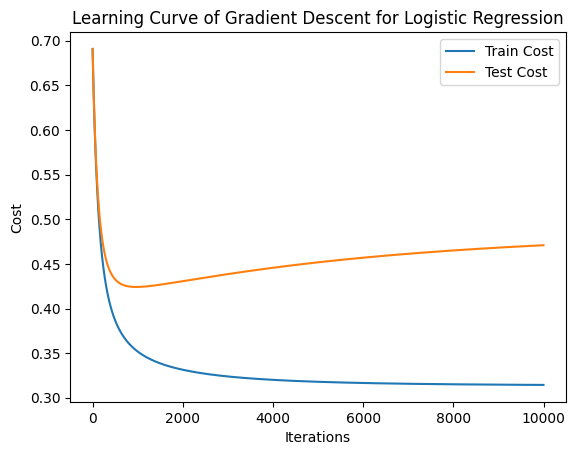

In [17]:
# Plotting the learning curve of gradient descent. 
plt.plot(J_history, label='Train Cost')
plt.plot(test_J_history, label='Test Cost')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Learning Curve of Gradient Descent for Logistic Regression')
plt.legend()
plt.show()

## Task 3: Regularization Analysis - Finding the Optimal λ Value **(20 points)**

`lambda_reg` controls the strength of the regularization applied to the model.  
- When `lambda_reg` is set to **zero**, regularization is effectively turned off.  
- As `lambda_reg` increases, the penalty for large weights becomes more significant, helping to **reduce overfitting**.  



### 🔧 Task Instructions
- Experiment with different values of `lambda_reg` in the set **[0.0, 0.01, 0.03, 0.1, 0.3]**.  
- Plot the **learning curves** for both the training and test sets on the same figure to visualize the impact of each value.  
- Determine which value of `lambda_reg` yields the **best performance** on this dataset.  
- Report the performance (accuracy, precision, recall) using the best value of:  
  - **Accuracy**  
  - **Precision**  
  - **Recall**  



**Hyperparameters for this task**:  
- `learning_rate = 0.005`  
- `num_iterations = 1200`  


Iteration 0: Train Cost 0.6907913427689406, Test Cost 0.6908300031552994
Iteration 1000: Train Cost 0.35149397109303737, Test Cost 0.42323064992177334


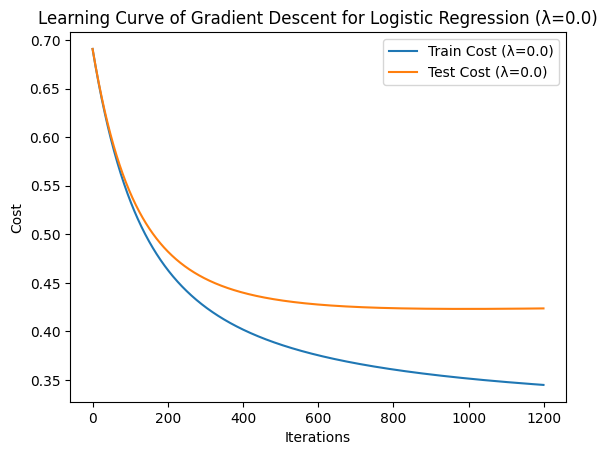

Iteration 0: Train Cost 0.6907913430117953, Test Cost 0.6908300041187557
Iteration 1000: Train Cost 0.3515246819737645, Test Cost 0.4233237875766588


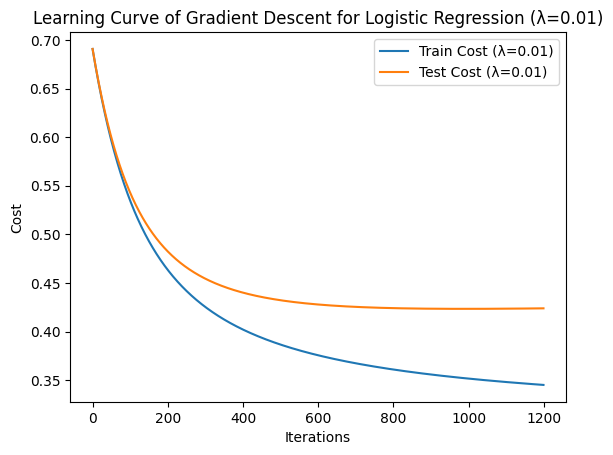

Iteration 0: Train Cost 0.6907913434975047, Test Cost 0.6908300060456685
Iteration 1000: Train Cost 0.3515860825715775, Test Cost 0.42350997620608455


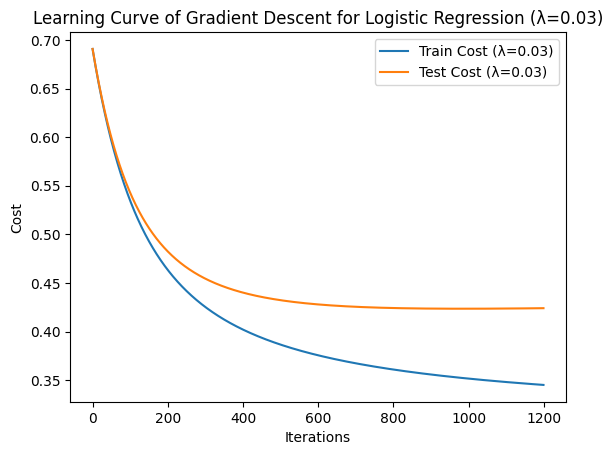

Iteration 0: Train Cost 0.6907913451974876, Test Cost 0.6908300127898629
Iteration 1000: Train Cost 0.3518007626983218, Test Cost 0.42416072737158333


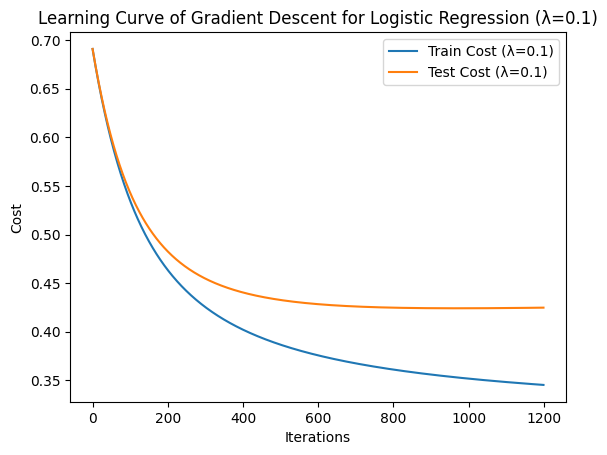

Iteration 0: Train Cost 0.6907913500545816, Test Cost 0.6908300320589897
Iteration 1000: Train Cost 0.3524122381872343, Test Cost 0.42601225207826204


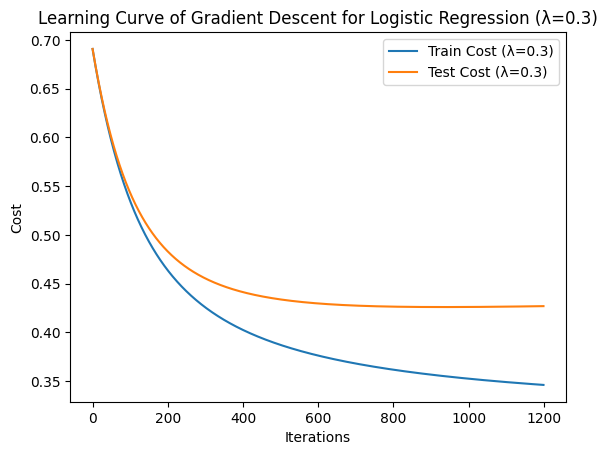

Lambda            0.000000
Train Accuracy    0.867769
Accuracy          0.836066
Precision         0.828571
Recall            0.878788
Final Cost        0.423745
Name: 0, dtype: float64

In [ ]:
# Set up the model parameters for lambda_reg to [0.0, 0.01,0.03,0.1, 0.3]
lambda_values = [0.0, 0.01, 0.03, 0.1, 0.3]
#Test the function for different lambda values and compute accuracy precision and recall. Keep track of the final cost for each of the lambdas. 
#Report the learning curves for the both the training and test sets on the same figure to visualize the impact of each value


results = []

for lambda_reg in lambda_values:
    w, J_history, test_J_history = gradient_descent_logistic(X_train_scaled_1, X_test_scaled_1, y_train, y_test,
                                                           initialize_w, alpha = 0.005, num_iters = 1200, lambda_reg=lambda_reg)
    #Make predictions on the test set
    predictions_test = sigmoid(X_test_scaled_1 @ w) >= 0.5
    y_test_flat = y_test.ravel()
    predictions_train = sigmoid(X_train_scaled_1 @w) >= 0.5
    y_train_flat = y_train.ravel()

    
    #Compute accuracy, precision, recall
    from sklearn.metrics import accuracy_score, precision_score, recall_score
    train_accuarcy = accuracy_score(y_train_flat, predictions_train)
    accuracy = accuracy_score(y_test_flat, predictions_test)
    precision = precision_score(y_test_flat, predictions_test)
    recall = recall_score(y_test_flat, predictions_test)
    results.append({
        'Lambda': lambda_reg,
        'Train Accuracy': train_accuarcy,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall, 
        "Final Cost": test_J_history[-1]
    })
    # Plotting the learning curve of gradient descent for each lambda value
    plt.plot(J_history, label=f'Train Cost (λ={lambda_reg})')
    plt.plot(test_J_history, label=f'Test Cost (λ={lambda_reg})')
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    plt.title(f'Learning Curve of Gradient Descent for Logistic Regression (λ={lambda_reg})')
    plt.legend()
    plt.show()


results_df = pd.DataFrame(results)
results_df

#Best Model, lowest final test cost
best_model = results_df.loc[results_df['Final Cost'].idxmin()]
best_model

## Task 4: Custom vs. scikit-learn — Comprehensive Benchmark Analysis **(20 points)**

- Use the **`LogisticRegression`** model from **scikit-learn** to re-evaluate the dataset while keeping the same (or as similar as possible) hyperparameter settings for a **fair comparison**.  
- Report the performance using the **same evaluation metrics** as previously used.  
- Compare the results to your **custom implementation**. Analyze whether scikit-learn’s built-in logistic regression achieves similar, better, or worse performance.  
- Explain the potential reasons for any differences you observe. 



In [31]:
# use a logistic regression from scikit leran to evaluate the same dataset (keep the same hyperparameter settings for a fair comparison
from sklearn.linear_model import LogisticRegression

#Logistic Regression from sklearn, using the same hyperparameters as above

best_lamba = best_model['Lambda']
#Here C is the inverse of lambga_reg, but if the lambda is 0, set C to large value for regularization 
if best_lamba == 0:
    best_lamba = 1e6 # To avoid division by zero

#The model 
model = LogisticRegression(penalty='l2', C=1/best_lamba, solver= 'lbfgs', max_iter=1200, random_state = 42)

#Fit on the training data
model.fit(X_train_scaled, y_train.ravel())

#Predict on the test data
sklearn_predictions = model.predict(X_test_scaled)

#Now put the results into a dataframe for comparison, the accuracy, precision, and recall for the test data 
sklearn_accuracy = accuracy_score(y_test.ravel(), sklearn_predictions)
sklearn_precision = precision_score(y_test.ravel(), sklearn_predictions, zero_division = 0)
sklearn_recall = recall_score(y_test.ravel(), sklearn_predictions, zero_division = 0)
sklearn_results = {
    'Model': 'Sklearn Logistic Regression',
    'Accuracy': sklearn_accuracy,
    'Precision': sklearn_precision,
    'Recall': sklearn_recall
}

In [94]:
best_lambda = best_model["Lambda"]
C_value = 1 / best_lambda if best_lambda > 0 else 1e6

model = LogisticRegression(penalty="l2", C=C_value, solver="saga",max_iter=1200, random_state=42)
model.fit(X_train_scaled, y_train.ravel())

y_train_pred = model.predict(X_train_scaled)
y_test_pred  = model.predict(X_test_scaled)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy  = accuracy_score(y_test, y_test_pred)
test_precicison = precision_score(y_test, y_test_pred, zero_division=0)
test_recall = recall_score(y_test,  y_test_pred,  zero_division=0)

print("LogisticRegression Results")
print(f"λ (equivalent): {best_lambda}, C={C_value:.3f}")
print(f"Train accuracy: {train_accuracy:.3f}")
print(f"Test  accuracy:  {test_accuracy:.3f}")
print(f"Test  precision: {test_precicison:.3f}")
print(f"Test  recall:    {test_recall:.3f}")

# Comparison
print("\nCustom Results using Gradient Descent")
print(f"λ={best_lambda}")
print(f"Train accuracy: {best_model['Train Accuracy']:.3f}")
print(f"Test  accuracy:  {best_model['Accuracy']:.3f}")
print(f"Test  precision: {best_model['Precision']:.3f}")
print(f"Test  recall:    {best_model['Recall']:.3f}")

LogisticRegression Results
λ (equivalent): 0.0, C=1000000.000
Train accuracy: 0.860
Test  accuracy:  0.820
Test  precision: 0.775
Test  recall:    0.939

Custom Results using Gradient Descent
λ=0.0
Train accuracy: 0.868
Test  accuracy:  0.836
Test  precision: 0.829
Test  recall:    0.879


Comparing the results from my custom function and the sklearn function, we see similar test accuracy, precision, and recall. This gives light that my custom approach is nearly identical to the sklearn logistic regression. We cans ee that my custom model performs better on test recall, while the logistc regression results are better for test accuracy and precision. This would mean scikit-learn did a better job at catching more psoitives. 

The reason for these differences is the way that SAGA is performed on the data compared to the gradient descent algorithm. The SAGA solver uses stochastic gradient descent, i.e small batches or single samples. In addition, the recall might be higher for scikit-learn because we have a fixed number of iterations at 1200, while the default iterations is set by tol (default = 1e-4.)

## Task 5: Understanding Convergence - The `tol` Parameter Deep Dive **(15 points)**

In many models that use gradient descent–based optimization, `tol` is a key hyperparameter.  
In this task, you will explore its role using **logistic regression**.

### **Understanding the Tolerance Parameter**
The `tol` parameter in sklearn's LogisticRegression controls **when to stop the optimization process**:

- **What it measures**: Maximum change in the optimization objective between iterations
- **Stopping criterion**: Training stops when improvement falls below this threshold
- **Trade-off**: Tighter tolerance (smaller values) → more iterations → potentially better convergence
- **Efficiency**: Looser tolerance (larger values) → fewer iterations → faster training but potentially suboptimal results

### **Mathematical Context**
For solver convergence, sklearn typically uses:
$$|\nabla J(\mathbf{w}^{(t)}) - \nabla J(\mathbf{w}^{(t-1)})| < \text{tol}$$
Or for objective function change:
$$|J(\mathbf{w}^{(t)}) - J(\mathbf{w}^{(t-1)})| < \text{tol}$$


### **Expected Insights**

Experiment with the following `tol` values to explore their impact on model convergence, training speed, and performance:

**Typical Patterns You Should Observe:**
- **Tighter tolerance (`1e-6`, `1e-7`)** → Training is slower but may yield slightly better performance.  
- **Moderate tolerance (`1e-4`, `1e-5`)** → A good balance between speed and accuracy (close to scikit-learn’s default).  
- **Loose tolerance (`1e-1`, `1e-2`)** → Faster training but may stop too early, leading to suboptimal results.  
- **Performance plateau** → Beyond a certain level of tightness, further decreasing tolerance does not yield meaningful gains.  
- **Convergence issues** → Extremely tight tolerance may require more iterations than allowed, preventing proper convergence.  


### ✅ **Success Criteria**
- [ ] Systematic testing across tolerance range (8+ values)
- [ ] Comprehensive performance and efficiency metrics
- [ ] Professional visualization with multiple perspectives
- [ ] Clear identification of trade-offs and recommendations
- [ ] Evidence-based analysis of sklearn's default choice

In [67]:
#Complete analysis of tol with 8 values. use the LogisticRegression function 
#Keep track of time taken for each tol values as well as the 
import time

C_value = 1e6
tol_results = []
tol_values = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8]
for tol in tol_values:
    start_time = time.time()
    #Adding the logistic regression
    model = LogisticRegression(penalty='l2', C=C_value, solver= "lbfgs", tol=tol, max_iter=5000, random_state = 42)
    model.fit(X_train_scaled, y_train.ravel())
    end_time = time.time()

    #Get predictions
    predictions_test = model.predict(X_test_scaled)
    predictions_train = model.predict(X_train_scaled)
    
    #Compute accuracy, precision, recall
    train_accuracy = accuracy_score(y_train.ravel(), predictions_train)
    test_accuracy = accuracy_score(y_test.ravel(), predictions_test)
    test_precision = precision_score(y_test.ravel(), predictions_test, zero_division = 0)
    test_recall = recall_score(y_test.ravel(), predictions_test, zero_division = 0)

    #Add these to a dataframe with the each tol_value, time_taken, test_accuracy, test_precision, test_recall, train_accuracy, number of iterations to converge

    iterations = model.n_iter_[0]
    time_taken = end_time - start_time

    #Now put into dictionary
    tol_results.append({
        'Tol': tol,
        'Time Taken (s)': time_taken,
        'Train Accuracy': train_accuracy,
        'Test Accuracy': test_accuracy,
        'Test Precision': test_precision,
        'Test Recall': test_recall,
        'Iterations': iterations
    })

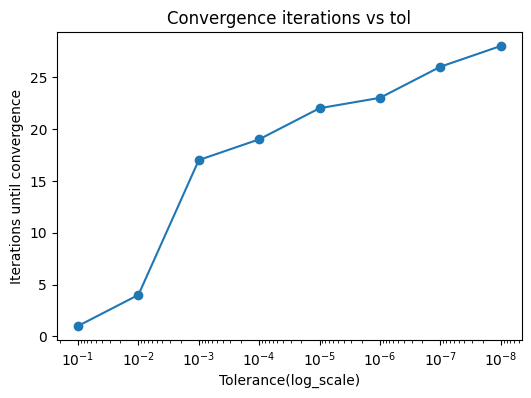

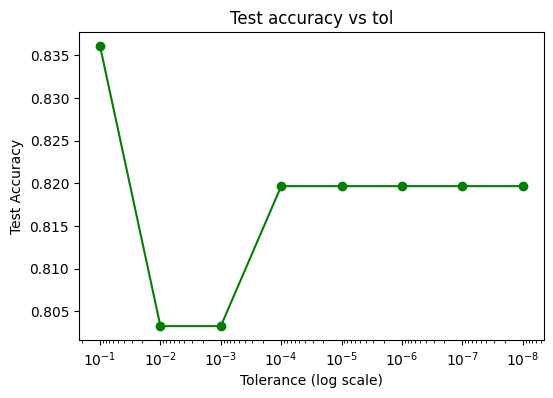

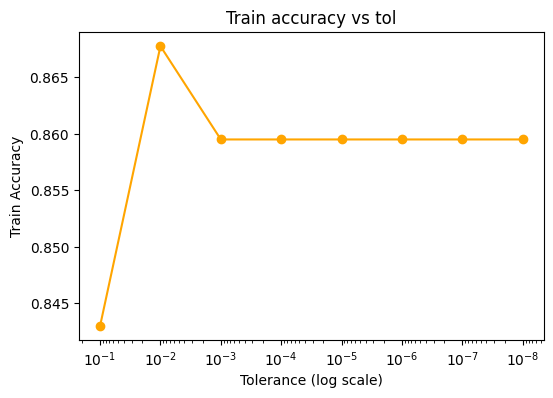

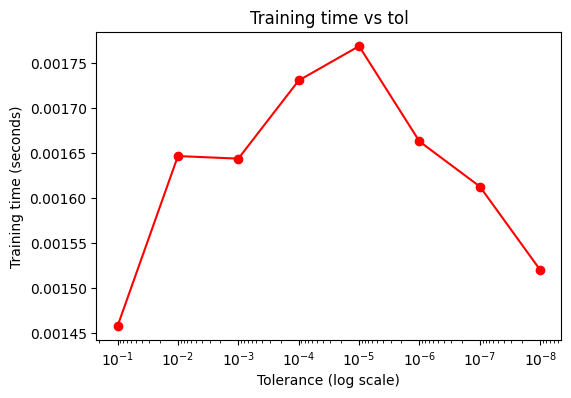

In [91]:
#Comparing the resutls 
# Looking at numb_iterations vs. tol to converge 
import matplotlib.pyplot as plt
results_tol = sorted(tol_results, key=lambda x: x["Tol"])

tols = [result['Tol'] for result in tol_results]
iterations = [result['Iterations'] for result in tol_results]
test_accuracies = [result['Test Accuracy'] for result in tol_results]
times = [result['Time Taken (s)'] for result in tol_results]


# How does number of iterations change as tol changes
plt.figure(figsize=(6,4))
plt.semilogx(tols, iterations, marker='o')
plt.gca().invert_xaxis()
plt.xlabel("Tolerance(log_scale)")
plt.ylabel("Iterations until convergence")
plt.title("Convergence iterations vs tol")
plt.show()   

# How does test accuracy change as tol changes
plt.figure(figsize=(6,4))
plt.semilogx(tols, test_accuracies, marker='o', color='green')
plt.gca().invert_xaxis()
plt.xlabel("Tolerance (log scale)")
plt.ylabel("Test Accuracy")
plt.title("Test accuracy vs tol")
plt.show()

#How does train accuracy change as tol changes
train_accuracies = [result['Train Accuracy'] for result in tol_results]
plt.figure(figsize=(6,4))
plt.semilogx(tols, train_accuracies, marker='o', color='orange')
plt.gca().invert_xaxis()
plt.xlabel("Tolerance (log scale)")
plt.ylabel("Train Accuracy")
plt.title("Train accuracy vs tol")
plt.show()

# How does training time change as tol changes
times = [result['Time Taken (s)'] for result in tol_results]
plt.figure(figsize=(6,4))
plt.semilogx(tols, times, marker='o', color='red')
plt.gca().invert_xaxis()
plt.xlabel("Tolerance (log scale)")
plt.ylabel("Training time (seconds)")
plt.title("Training time vs tol")
plt.show()

The number iterations vs. tolerance scales shows that as the tol becomes tigher (i.e. going from 10-1 to 10-5) the number of iterations increase. For the Test Accuracy vs the tol, in wider tol the performance (test accuracy) decreases. Then at 10-4, the performance tends to stay stagnant. According to the original definition of tol, we should observe periods of tol where the performance does not increase. Lastly looking at the training time and the number seconds follows a parabola pattern. it peaks at 10e-5. We can see that there is an obviou tradeoff between different tol values. It seems like the most stable tol are in the range of 10e-4 and 10e-5. Even though they have higher training time, they have the best costs and a low number of iterations. In the range of 10e-3 and 10e-2 we have low number of iterations but high cost. 

In [ ]:
# Print summary of tol experiment
print("Summary of tol experiment")
for values in tol_results:
    print(values)

Summary of tol experiment
{'Tol': 0.1, 'Time Taken (s)': 0.0014579296112060547, 'Train Accuracy': 0.8429752066115702, 'Test Accuracy': 0.8360655737704918, 'Test Precision': 0.8285714285714286, 'Test Recall': 0.8787878787878788, 'Iterations': np.int32(1)}
{'Tol': 0.01, 'Time Taken (s)': 0.0016467571258544922, 'Train Accuracy': 0.8677685950413223, 'Test Accuracy': 0.8032786885245902, 'Test Precision': 0.7692307692307693, 'Test Recall': 0.9090909090909091, 'Iterations': np.int32(4)}
{'Tol': 0.001, 'Time Taken (s)': 0.0016438961029052734, 'Train Accuracy': 0.859504132231405, 'Test Accuracy': 0.8032786885245902, 'Test Precision': 0.7692307692307693, 'Test Recall': 0.9090909090909091, 'Iterations': np.int32(17)}
{'Tol': 0.0001, 'Time Taken (s)': 0.0017306804656982422, 'Train Accuracy': 0.859504132231405, 'Test Accuracy': 0.819672131147541, 'Test Precision': 0.775, 'Test Recall': 0.9393939393939394, 'Iterations': np.int32(19)}
{'Tol': 1e-05, 'Time Taken (s)': 0.0017688274383544922, 'Train Acc

## Bonus Task: Implementing `tol` in Your L2 Gradient Descent (15 points)

*This is a bonus task, feel free to skip this task*

To make your **custom L2-regularized gradient descent** implementation comparable with scikit-learn’s `LogisticRegression`, you should add the `tol` parameter as a **stopping criterion**.  

### ✅ Instructions:
1. During each iteration of gradient descent, compute the **change in cost (loss)** between the current and previous step.  
2. If the change is **smaller than `tol`**, stop the training loop early.  
3. Use the same tolerance values (`tol`) as in scikit-learn for a fair comparison.  
4. Report:  
   - The number of iterations completed before convergence.  
   - Final training and test performance metrics.  

## Task 6: Summarize your findings below **(5 points)**

In [86]:
#Modify gradient descent to include a tol parameter as a stopping criterion. 
def gradient_descent_logistic_tol(X_train, X_test, y_train, y_test, w_init, alpha, num_iters, lambda_reg, tol):
    w = w_init.copy() #Initialize weights
    train_costs = [] #To store training costs
    test_costs = []  #To store testing costs
    
    for i in range(num_iters):
        #Compute gradients
        dj_dw = compute_gradient_logistic(X_train, y_train, w, lambda_reg)
        
        #Update weights
        w -= alpha * dj_dw
        
        #Compute and store costs
        train_cost = compute_cost_logistic(X_train, y_train, w, lambda_reg)
        test_cost = compute_cost_logistic(X_test, y_test, w, lambda_reg)
        train_costs.append(train_cost)
        test_costs.append(test_cost)

        # Check the tol criterion. If the change in cost between iteration of current and previous is less than tol, stop loop
        if i > 0 and abs(train_costs[-1] - train_costs[-2]) < tol:
            #print(f"Converged at iteration {i} with train cost change {abs(train_costs[-1] - train_costs[-2])}")
            break
        
        # Optionally print cost every 100 iterations
        #if i % 1000 == 0:
            #print(f"Iteration {i}: Train Cost {train_cost}, Test Cost {test_cost}")
    
    return w, train_costs, test_costs,i+1

In [87]:
#Now lets test this new function with the same hyperparameters as before, but with different tol values
results = []
tol_values = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8]
lambda_reg = 0.0
for tol in tol_values:
    
    w, J_history, test_J_history, iterations = gradient_descent_logistic_tol(X_train_scaled_1, X_test_scaled_1, y_train, y_test,
                                                           initialize_w, alpha = 0.005, num_iters = 5000, lambda_reg=0.0, tol=tol)
    
    #Make predictions on the test set
    predictions_test = sigmoid(X_test_scaled_1 @ w) >= 0.5
    y_test_flat = y_test.ravel()
    predictions_train = sigmoid(X_train_scaled_1 @w) >= 0.5
    y_train_flat = y_train.ravel()

    #Compute accuracy, precision, recall
    train_accuarcy = accuracy_score(y_train_flat, predictions_train)
    accuracy = accuracy_score(y_test_flat, predictions_test)
    precision = precision_score(y_test_flat, predictions_test)
    recall = recall_score(y_test_flat, predictions_test)
    results.append({
        'Lambda': lambda_reg,
        'Tolerance': tol,
        'iterations': iterations,
        'Train Accuracy': train_accuarcy,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall, 
        "Final Cost": test_J_history[-1]
    })

In [90]:
results_df_tol = pd.DataFrame(results)
results_df_tol

,Lambda,Tolerance,iterations,Train Accuracy,Accuracy,Precision,Recall,Final Cost
0,0.0,1.000000e-01,2,0.842975,0.836066,0.828571,0.878788,0.688535
1,0.0,1.000000e-02,2,0.842975,0.836066,0.828571,0.878788,0.688535
2,0.0,1.000000e-03,102,0.842975,0.836066,0.828571,0.878788,0.541923
3,0.0,1.000000e-04,582,0.847107,0.836066,0.828571,0.878788,0.428375
4,0.0,1.000000e-05,2123,0.867769,0.819672,0.805556,0.878788,0.430171
5,0.0,1.000000e-06,5000,0.863636,0.803279,0.783784,0.878788,0.449803
6,0.0,1.000000e-07,5000,0.863636,0.803279,0.783784,0.878788,0.449803
7,0.0,1.000000e-08,5000,0.863636,0.803279,0.783784,0.878788,0.449803


From the results we can see that at much looser tol, the number of iterations it takes for convergence is very low. Occurs with values >10e-3. This means that the cost functions changes by greater than the tolerance, stopping the model from continuing the gradient descent. However, when tol is tighter this takes many iterations to converge, and not improving test accuracy and test and test preicion. The best overall recall, accuracy, precision, and cost occured when tol = 10e-4. From before we saw that the highest accuracy occured at this range as well. This confirms our experiment of tol. 

## AI Use Disclosure **(5 pts)**

In **1–3 short paragraphs**, clearly state whether **generative AI tools** were used to complete any part of this assignment.

- If **no AI was used**, write:  
  *“I did not use generative AI tools on this assignment.”*  

- If **AI was used**, you must specify:  
  1. **Tool(s)** used (e.g., ChatGPT, GitHub Copilot, Claude, etc.)  
  2. **How** they were used (e.g., idea generation, debugging, code suggestions, writing help)  
  3. **Where** they influenced your work (which questions/sections)  
  4. **Edits & verification** you made (how you checked correctness, what you modified)  

### AI Use Template
- **Used AI?** Yes / No  
- **Tool(s):**  
- **Purpose / How used (1–3 sentences):**  
- **Scope (which questions/sections):**  
- **Edits & verification (what you changed and how you checked correctness):**  

> **Example (for illustration only):**  
> - Used AI? Yes  
> - Tools: ChatGPT (free), GitHub Copilot  
> - How used: Asked for a pandas snippet to impute missing values and for a seaborn example.  
> - Scope: Q1(b) imputation, Q2(a) first draft of bar chart code.  
> - Edits & verification: Rewrote code to use `groupby().transform('median')`; validated results by comparing summary stats; added axis labels manually.  

**Grading (5 points):**  
- **5 points** = complete, specific, and honest (tools named, usage described clearly)  
- **3–4 points** = vague or missing some details  
- **1–2 points** = minimal effort or very unclear  
- **0 points** = missing or misleading disclosure  


- Used AI? Yes  
- Tools: GitHub Copilot/ChatGPT Model 5 (I have Copilot premium through school account)
- How used: Explain the concentual concepts of tol. With this description of tol, can you explain to me what is really going on here. What is the best way to implement into my original gradient descent. 
- Scope: Bonus Task implementation
- Edits & verification: Rewrote a part of my function to take in the tol parameter;gave suggestions on how to compare the previous cost and the current cost to stop iterations; wrote `if i > 0 and abs(train_costs[-1] - train_costs[-2]) < tol`. And added a `break` statement to exit the loop and return the values. 

- Used AI? Yes  
- Tools: GitHub Copilot (I have Copilot premium through school account)
- How used: What is the best way to present the findings according to the following criteria:  [ ] Systematic testing across tolerance range (8+ values). [ ] Comprehensive performance and efficiency metrics, [ ] Professional visualization with multiple perspectives, [ ] Clear identification of trade-offs and recommendations, [ ] Evidence-based analysis of sklearn's default choice. 
- Scope: Graphs for Task 5
- Edits & verification: Copilot gave me several ideas of how to best present my findings. It gave me the idea to write code for the graphs 1. test accuracy vs. tol 2. Training time vs. tol, and Convergence iterations vs tol; changed axis to log scale for easier analysis; wrote: `plt.semilogx(tols, iterations, marker='o')`. 

- Used AI? Yes  
- Tools: GitHub Copilot (I have Copilot premium through school account)
- How used: Fixed the mismatch of incompataitble numpy arrays. Input: Why is my function for gradient_descent outputting an error: saying that it can't broadcast certain operations. This is the error: *ValueError: operands could not be broadcast together with shapes (19,242) (19,)*
- Scope: Task1/all other tasks
- Edits & verification: Copilot suggested that I used `y_train.ravel` to flatten the array into a 1-D array (vector). This allowed for correct broadcasting. In addition, my cost function was outputting multiple values and forgot to sum the cost and divide by m to get the average. I used the y_train.ravel in all of my predictions as well so I make the analysis consistent. 

- Used AI? Yes  
- Tools: GitHub Copilot (I have Copilot premium through school account)
- How used: Determining the solver used for Logistic Regression. From Emre Besler's class we used the solve `saga`, but wanted to explore other solvers we can use. I did not want to use one similar to what we had for our custom function. Reserached and found one called `lbfgs`. 
- Scope: Task 4/Task5. 
- Edits & verification: Copilot suggestesd using the solver `lbfgs` instead of `saga` if I wanted to try different functions. It stands for Limited Memory Broyden-Fletcher-Goldfarb-Shanno. It looks at all the data samples and works well with smaller dense datasets. It takes smarter steps, but takes longer convergence. 